In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.core.display import display, HTML
import folium
import requests
from bs4 import BeautifulSoup

C:\Users\khanna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [4]:
#death_df.head()

In [5]:
#death_df['Province/State'].isna().all()

In [6]:
#confirmed_df.head()

In [7]:
#recovered_df.head()

In [8]:
#country_df.head()

In [9]:
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
country_df.columns = map(str.lower, country_df.columns)

In [10]:
death_df.rename(columns = {'province/state':'state', 'country/region':'country'}, inplace=True)
confirmed_df.rename(columns = {'province/state':'state', 'country/region':'country'}, inplace=True)
recovered_df.rename(columns = {'province/state':'state', 'country/region':'country'}, inplace=True)
country_df.rename(columns = {'country_region':'country'}, inplace=True)

In [11]:
#sorting by most number of cases/worst effected countries
sorted_country_df = country_df.sort_values('confirmed', ascending=False)

In [12]:
#sorted_country_df.head()

In [13]:
#we're concerned with Confirmed, deaths and recovered columns, so, apply style shade on them
def highlight_col(x):
    r = 'background-color: orange'
    b = 'background-color: purple'
    g = 'background-color: lime'
    
    temp_df = pd.DataFrame('', index = x.index, columns = x.columns)
    temp_df.iloc[:, 4] = r
    temp_df.iloc[:, 5] = b
    temp_df.iloc[:, 6] = g
    return temp_df

In [14]:
#sorted_country_df.head(5).style.apply(highlight_col, axis = None)

In [15]:
#(sorted_country_df.style.background_gradient(cmap='Reds'))

 # Coronavirus Dashboard
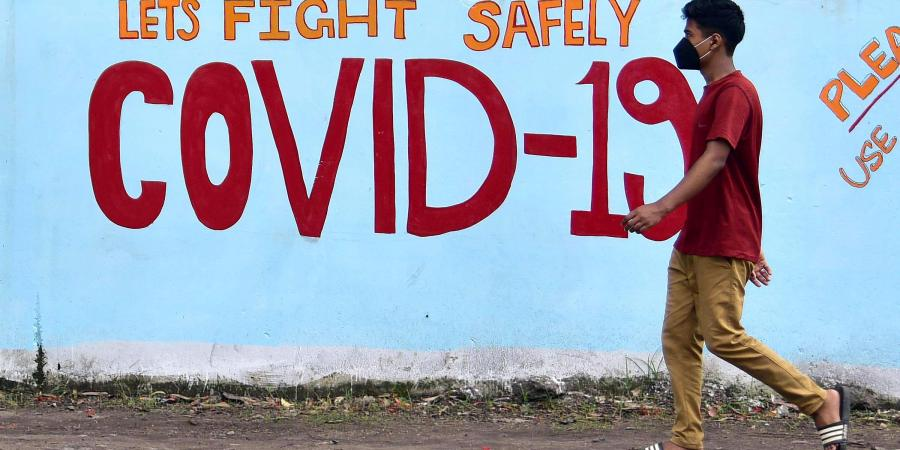





This Dashboard displays live visualizations of COVID data taken from John Hopkins University(https://github.com/CSSEGISandData/COVID-19) and https://covidindia.org/

In [16]:
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [17]:
display(HTML("<div style = 'background-color: #D1F4F8; padding: 30px '>" +
             "<span style='color: #black; font-size:25px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:25px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:25px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "<span style='color: blue; font-size:25px; margin-left:20px;'> Active: " + str(active_total) + "</span>"+
             "</div>")
       )

# Worst hit countries by COVID 19

Operate the slider to increase/decrease the number of countries.

In [19]:
#scatter plot of worst hit countries
def confirmed(Countries):
    
    fig_confirmed = px.scatter(sorted_country_df.head(Countries), x = 'country', y = 'confirmed', size = 'confirmed', color = 'country',
                    hover_name='country', size_max = 60)

    fig_confirmed.update_layout(title = {'text':'Top '+ str(Countries)+ ' Worst hit countries','y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Countries",
        yaxis_title="Confirmed Cases", legend_title="Countries",
                     font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        ))
    fig_confirmed.show();
    
interact(confirmed, Countries=(1,30));    

interactive(children=(IntSlider(value=15, description='Countries', max=30, min=1), Output()), _dom_classes=('w…

# Recovered cases with respect to countries

In [38]:
#recovered cases
def recovered(Countries):
    
    fig_recovered = px.scatter(country_df.sort_values('recovered', ascending = False).head(Countries), 
                               x = 'country',
                               y = 'recovered', size = 'recovered', color = 'country',
                    hover_name='country', size_max = 60)

    fig_recovered.update_layout(title = {'text':'Top ' + str(Countries)+' countries with most recovered cases','y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Countries",
        yaxis_title="Recovered Cases", legend_title="Countries",
                     font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        ))
    fig_recovered.show();

In [39]:
interact(recovered, Countries=(1,30));

interactive(children=(IntSlider(value=15, description='Countries', max=30, min=1), Output()), _dom_classes=('w…

# Death Rate with respect to countries

In [25]:
#deaths
def deaths(Countries):
    
    fig_deaths = px.bar(country_df.sort_values('deaths', ascending = False).head(Countries), x = 'country', y = 'deaths', 
                        color = 'country',
                    hover_name='country')

    fig_deaths.update_layout(title = {'text':'Top ' + str(Countries)+' countries with highest deaths','y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Countries",
        yaxis_title="Number of deaths", legend_title="Countries",
                     font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        ))
    fig_deaths.show();

In [26]:
interact(deaths, Countries=(1,30));

interactive(children=(IntSlider(value=15, description='Countries', max=30, min=1), Output()), _dom_classes=('w…

# Active Cases with respect to countries

In [27]:
#active cases
def active(Countries):
    
    fig_active = px.bar(country_df.sort_values('active', ascending = False).head(Countries), x = 'country', y = 'active', 
                        color = 'country',
                    hover_name='country')

    fig_active.update_layout(title = {'text':'Top '+ str(Countries)+' countries with highest active cases','y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Countries",
        yaxis_title="Number of active cases", legend_title="Countries",
                     font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        ))
    fig_active.show();

In [28]:
interact(active, Countries=(1,30));

interactive(children=(IntSlider(value=15, description='Countries', max=30, min=1), Output()), _dom_classes=('w…

# Number of Confirmed Cases in the world with respect to deaths

In [29]:
#plotting number of deaths wrt to cases for countries
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['#00ccff', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure()
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,5:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,5:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
        
    fig.show();   

In [30]:
plot_cases_of_a_country('world')

# Country wise confirmed cases with respect to deaths

In [31]:
#making the plots interactive using ipywidgets (Country wise confirmed cases and deaths)
interact(plot_cases_of_a_country, country=confirmed_df['country'].unique());

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [32]:
#making the plots interactive using ipywidgets (Whole world confirmed cases and deaths)
#interact(plot_cases_of_a_country, country='World');

In [35]:
url = 'https://covidindia.org/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 4:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["State", "Confirmed cases","Recovered","Deaths"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data = state_data[:-1]

In [41]:
fig = px.choropleth(
    state_data,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Confirmed cases', hover_name = 'State',hover_data = ['Recovered', 'Deaths'],
    title = 'State-wise COVID19 cases in India',
    color_continuous_scale='Red'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show();

# World Map showing the Confirmed cases, deaths and death rate

In [33]:
world_map = folium.Map(location=[11,0], tiles="Stamen Terrain", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

In [34]:
world_map

In [36]:
#state_data